## Assignment 8: Bayesian Modeling to find the best parameters of the rainfall dataset
## Team Members-
## Ashritha Ashok Kumar Goramane, Sanket Khadke

In [1]:
# Importing the necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Importing the libraries of distributions used in this notebook from pymc3

from pymc3 import Model, Gamma, Uniform
from pymc3 import fit
from pymc3 import sample
from pymc3 import plot_posterior
from pymc3 import Model, Exponential

from scipy.stats.distributions import gamma

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## NOTE: The entire file takes a bit of time to run.

## Steps to model the Nashville rainfall using Bayesian model:
## 1) Plotting the histogram of rainfall data
## 2) Choosing a PDF that matches the shape of histogram
## 3) Finding hyperparameters of the distribution by plotting the posteriors

## We first read the rainfall dataset from nashville_precip.txt
## The dataset nashville_precip.txt contains NOAA precipitation data for the city of Nashville, Tennessee, measured since 1871.

In [2]:
precip = pd.read_table("nashville_precip.txt", index_col = 0, na_values = 'NA', delim_whitespace = True)

In [3]:
# Print out the first and last ten records of the training dataset

display(precip.head(10))

display(precip.tail(10))

Jan    Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                          
1871  2.76   4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32   2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96   7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22   9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15   3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30
1876  6.41   2.22  5.28   3.62  3.40  5.65  7.15  5.77  2.52  2.68  1.26  0.95
1877  4.05   1.06  4.98   9.47  1.25  6.02  3.25  4.16  5.40  2.61  4.93  2.49
1878  3.34   2.10  3.48   6.88  2.33  3.28  9.43  5.02  1.28  2.17  3.20  6.04
1879  6.32   3.13  3.81   2.88  2.88  2.50  8.47  4.62  5.18  2.90  5.85  9.15
1880  3.74  12.37  8.16   5.26  4.13  3.97  5.69  2.22  5.39  7.24  5.77  3.32

Jan   Feb   Mar   Apr    May   Jun   Jul   Aug    Sep   Oct   Nov   Dec
Year                                                                          
2002  4.93  1.99  9.40  4.31   3.98  3.76  5.64  3.13   6.29  4.48  2.91  5.81
2003  1.59  8.47  2.30  4.69  10.73  7.08  2.87  3.88   8.70  1.80  4.17  3.19
2004  3.60  5.77  4.81  6.69   6.90  3.39  3.19  4.24   4.55  4.90  5.21  5.93
2005  4.42  3.84  3.90  6.93   1.03  2.70  2.39  6.89   1.44  0.02  3.29  2.46
2006  6.57  2.69  2.90  4.14   4.95  2.19  2.64  5.20   4.00  2.98  4.05  3.41
2007  3.32  1.84  2.26  2.75   3.30  2.37  1.47  1.38   1.99  4.95  6.20  3.83
2008  4.76  2.53  5.56  7.20   5.54  2.21  4.32  1.67   0.88  5.03  1.75  6.72
2009  4.59  2.85  2.92  4.13   8.45  4.53  6.03  2.14  11.08  6.49  0.67  3.99
2010  4.13  2.77  3.52  3.48  16.43  4.96  5.86  6.99   1.17  2.49  5.41  1.87
2011  2.31  5.54  4.59  7.51   4.38  5.04  3.46  1.78   6.20  0.93  6.15  4.25

## Taking a look at the dataset, there are some NA values present in the Oct column.
## So, we perform data cleansing on that column.

In [4]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace = True)

## Data exploration by plotting the histograms

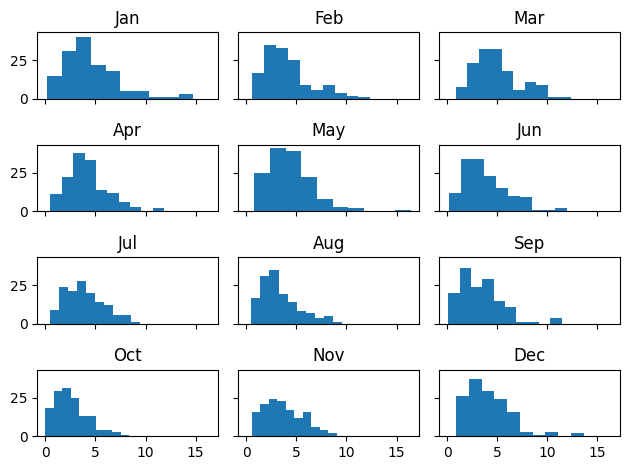

In [5]:
_ = precip.hist(sharex = True, sharey = True, grid = False)

plt.tight_layout()

## To find the best parameters of the rainfall dataset using Bayesian modeling

## We will model our data for the month of April using the following distributions -
## - Uniform Distribution
## - Exponential Distribution

# Uniform Distribution:

In [6]:
# Modeling the rainfall data

In [7]:
import pymc3 as pm

with Model() as rainfall_model:
    ualpha = Uniform('ualpha', lower = 0, upper = 15, shape = 12)
    ubeta = Uniform('ubeta', lower = 0, upper = 15, shape = 12)
    month_like = Gamma('month_like', alpha = ualpha, beta = ubeta, observed = precip)

In [8]:
# Simulating the rainfall data to find best values for α and β parameters.

In [9]:
# We define a random seed

RANDOM_SEED = 10000

In [10]:
with rainfall_model: 
    rainfall_trace = fit(random_seed = RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 4,782.6


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'ualpha'}>,
        <AxesSubplot: title={'center': 'ualpha'}>],
       [<AxesSubplot: title={'center': 'ubeta'}>,
        <AxesSubplot: title={'center': 'ubeta'}>]], dtype=object)

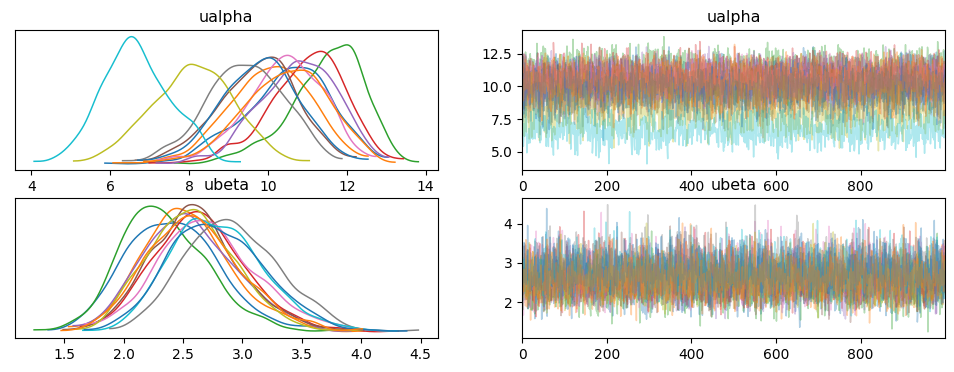

In [11]:
pm.traceplot(rainfall_trace)

Got error No model on context stack. trying to find log_likelihood in translation.


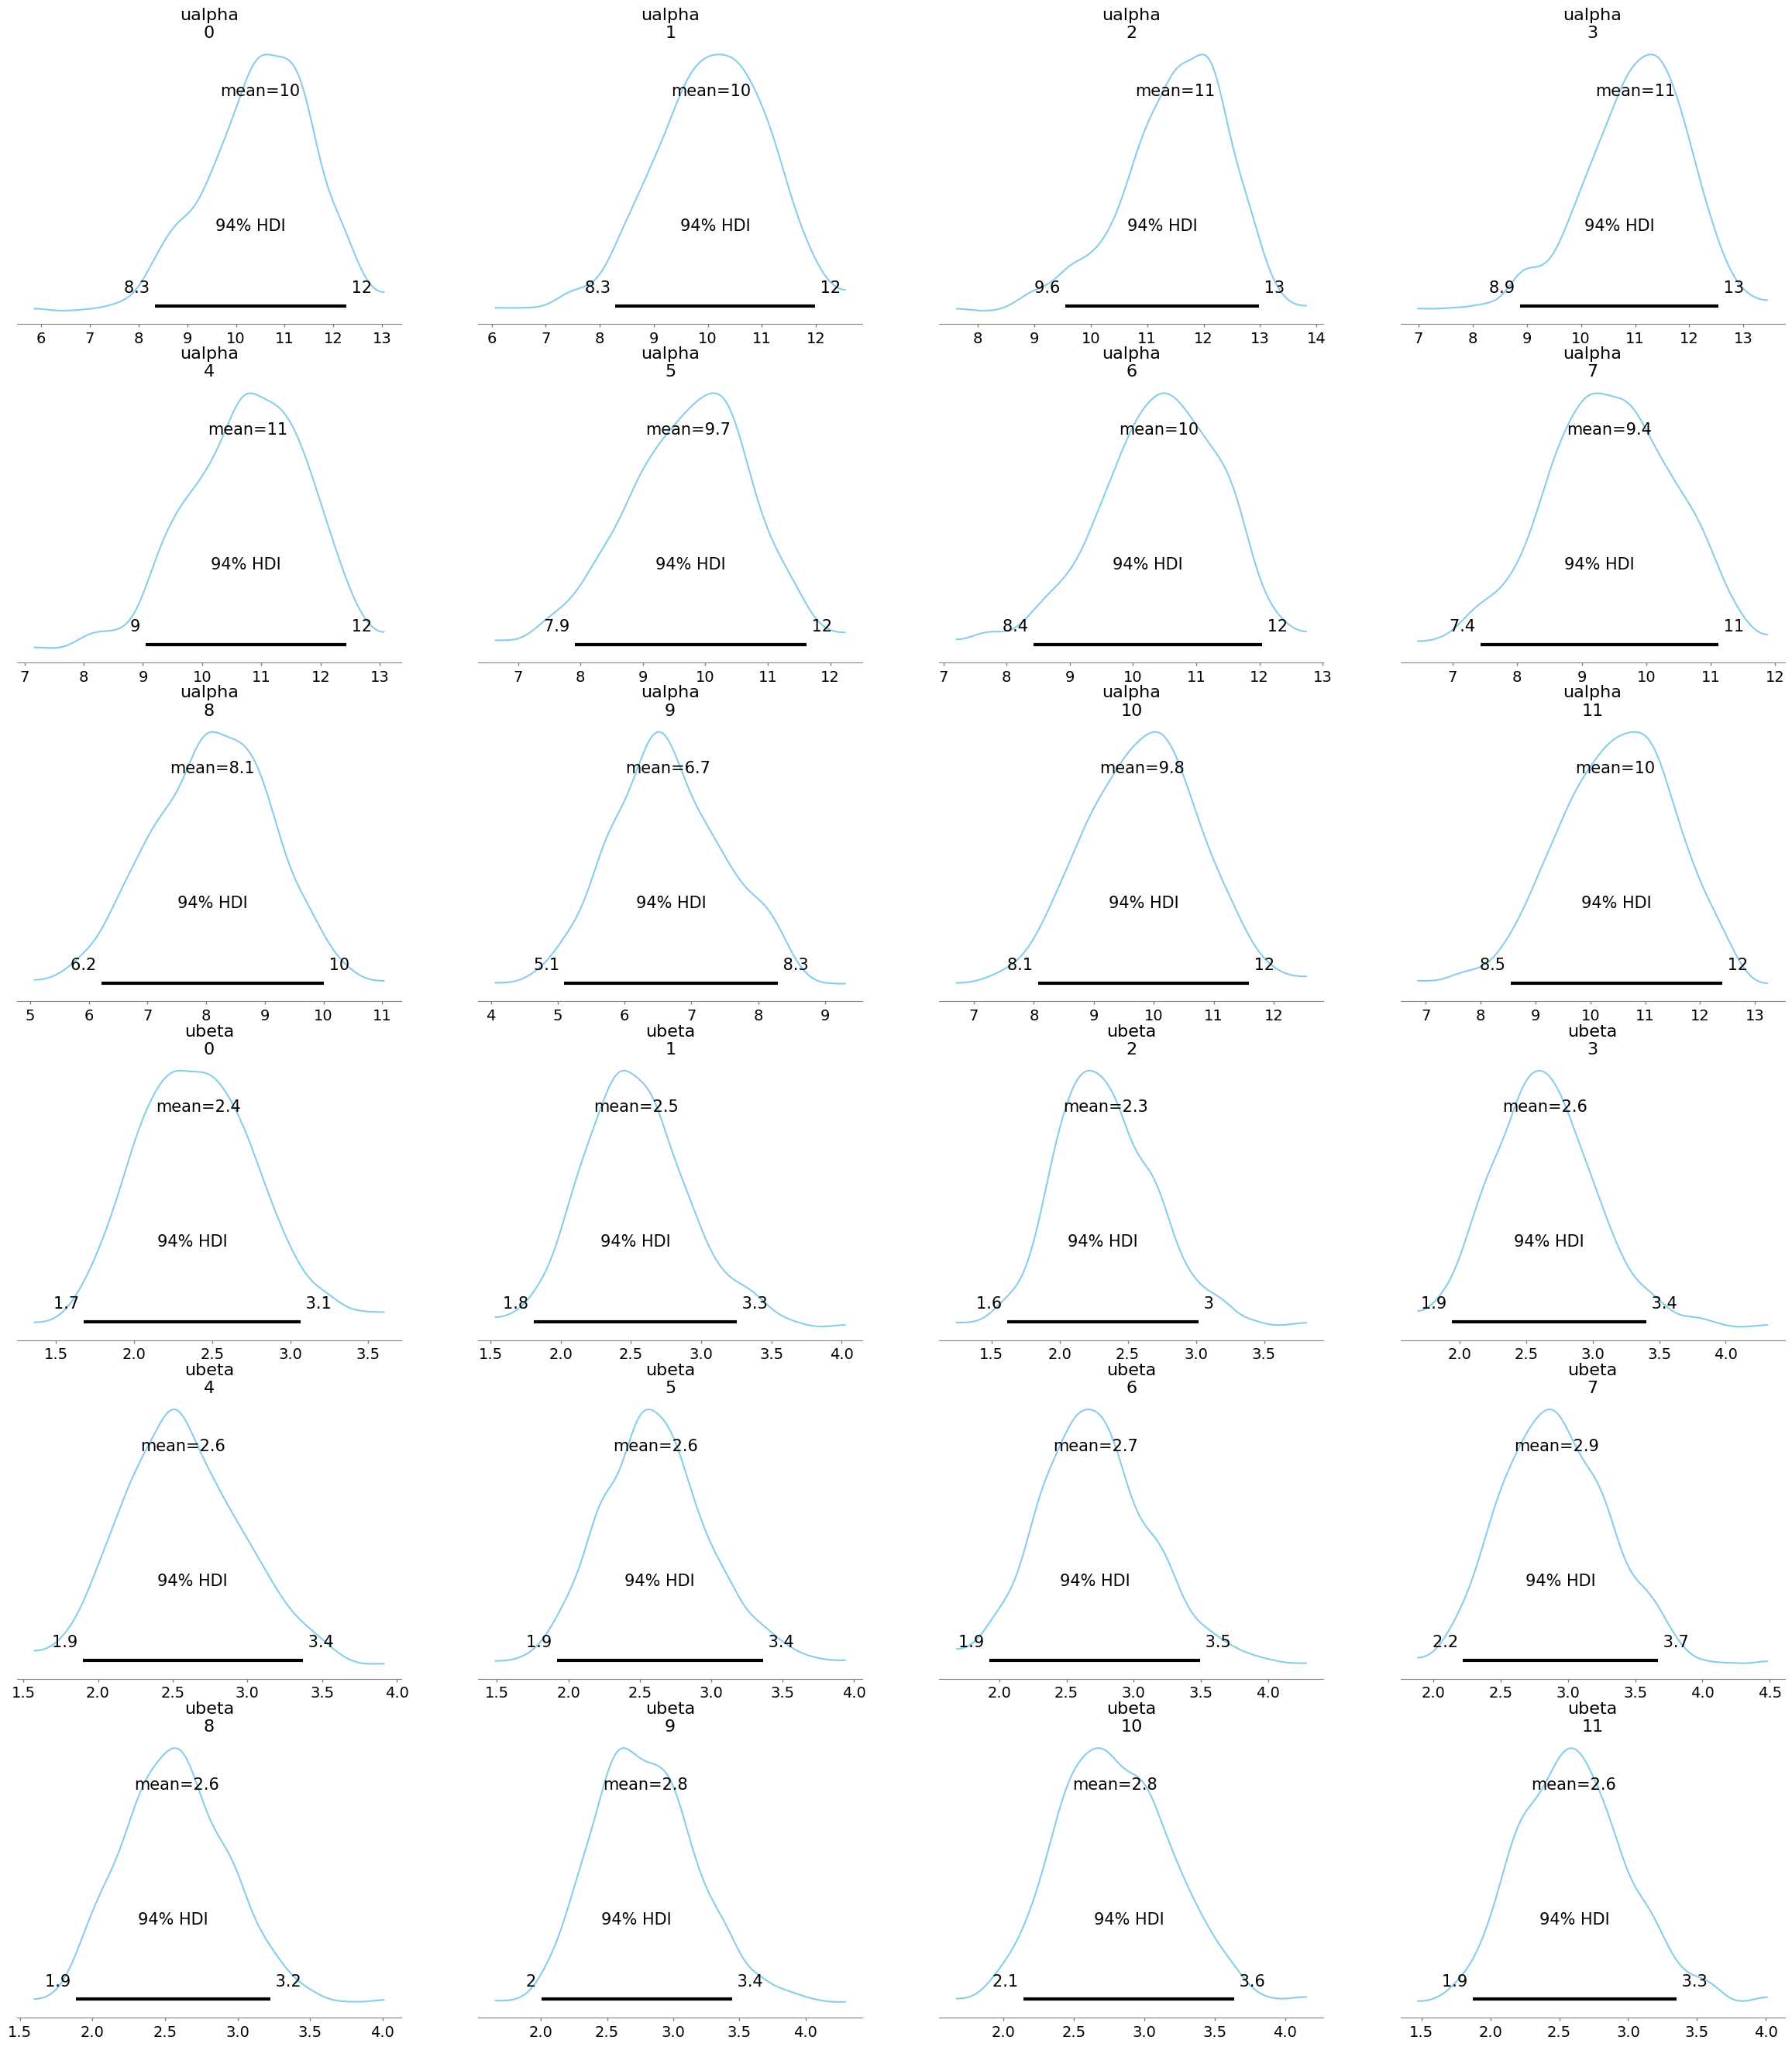

In [12]:
# Plotting the posterior pdf for the Nashville rainfall data

plot_posterior (rainfall_trace[100:], 
                var_names = ['ualpha', 'ubeta'],
                color = '#87ceeb');

Got error No model on context stack. trying to find log_likelihood in translation.


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

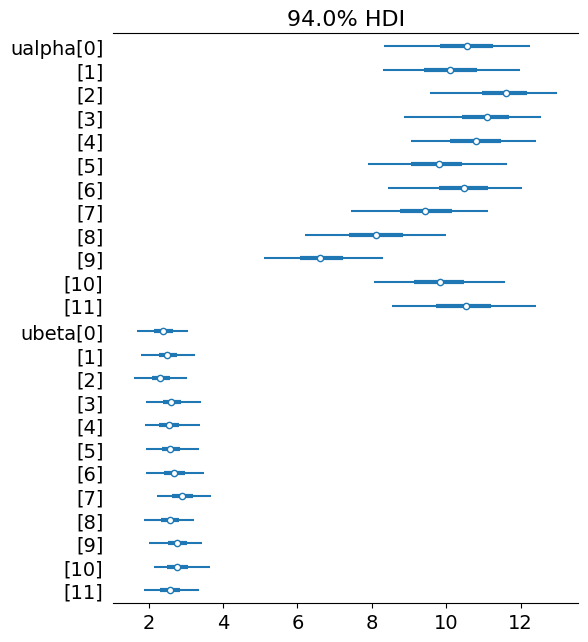

In [13]:
# Plotting the forest plot of rainfall trace

import arviz as az
az.plot_forest(rainfall_trace[100:], kind = 'forestplot')

In [14]:
summary_df = az.summary(rainfall_trace)
summary_df

Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
ualpha[0]   10.491  1.094   8.389   12.370      0.035    0.025     914.0   
ualpha[1]   10.046  1.031   8.204   11.887      0.036    0.025     821.0   
ualpha[2]   11.486  0.939   9.554   12.978      0.032    0.023     808.0   
ualpha[3]   10.985  0.973   8.912   12.570      0.032    0.022     947.0   
ualpha[4]   10.748  0.974   9.045   12.448      0.031    0.022     982.0   
ualpha[5]    9.730  1.000   7.787   11.549      0.032    0.023    1001.0   
ualpha[6]   10.406  0.985   8.415   12.043      0.032    0.023     950.0   
ualpha[7]    9.416  0.987   7.430   11.115      0.032    0.023     950.0   
ualpha[8]    8.097  1.034   6.152    9.994      0.032    0.022    1074.0   
ualpha[9]    6.655  0.863   5.188    8.355      0.028    0.020     921.0   
ualpha[10]   9.789  0.994   7.899   11.590      0.031    0.022    1011.0   
ualpha[11]  10.454  1.065   8.534   12.408      0.032    0.023    1096.0   
ubeta[0]     2.413  0.382   1.680    3.081      0.012    0.009     975.0   
ubeta[1]     2.540  0.377   1.830    3.281      0.011    0.008    1102.0   
ubeta[2]     2.341  0.367   1.718    3.108      0.011    0.008    1074.0   
ubeta[3]     2.644  0.391   1.977    3.450      0.013    0.009     905.0   
ubeta[4]     2.560  0.389   1.850    3.312      0.013    0.009     923.0   
ubeta[5]     2.605  0.383   1.918    3.360      0.012    0.008    1068.0   
ubeta[6]     2.715  0.422   1.923    3.508      0.014    0.010     938.0   
ubeta[7]     2.918  0.397   2.220    3.670      0.014    0.010     826.0   
ubeta[8]     2.579  0.368   1.874    3.201      0.013    0.009     798.0   
ubeta[9]     2.789  0.394   2.003    3.444      0.014    0.010     817.0   
ubeta[10]    2.786  0.407   2.126    3.639      0.012    0.009    1066.0   
ubeta[11]    2.598  0.398   1.823    3.290      0.014    0.010     852.0   

            ess_tail  r_hat  
ualpha[0]      785.0    NaN  
ualpha[1]      876.0    NaN  
ualpha[2]      814.0    NaN  
ualpha[3]      983.0    NaN  
ualpha[4]      983.0    NaN  
ualpha[5]      912.0    NaN  
ualpha[6]      886.0    NaN  
ualpha[7]      944.0    NaN  
ualpha[8]     1023.0    NaN  
ualpha[9]      873.0    NaN  
ualpha[10]     910.0    NaN  
ualpha[11]     840.0    NaN  
ubeta[0]       881.0    NaN  
ubeta[1]       904.0    NaN  
ubeta[2]       949.0    NaN  
ubeta[3]       942.0    NaN  
ubeta[4]       944.0    NaN  
ubeta[5]       929.0    NaN  
ubeta[6]       821.0    NaN  
ubeta[7]      1024.0    NaN  
ubeta[8]       890.0    NaN  
ubeta[9]       841.0    NaN  
ubeta[10]      978.0    NaN  
ubeta[11]      973.0    NaN

In [15]:
# Defining ualpha_mean and ubeta_mean for April

Apr_ualpha_mean = summary_df.loc["ualpha[0]", "mean"]
Apr_ubeta_mean = summary_df.loc["ubeta[0]", "mean"]
Apr_ualpha_mean, Apr_ubeta_mean

(10.491, 2.413)

## Plotting the graph that represents the Uniform Distribution for the April month.

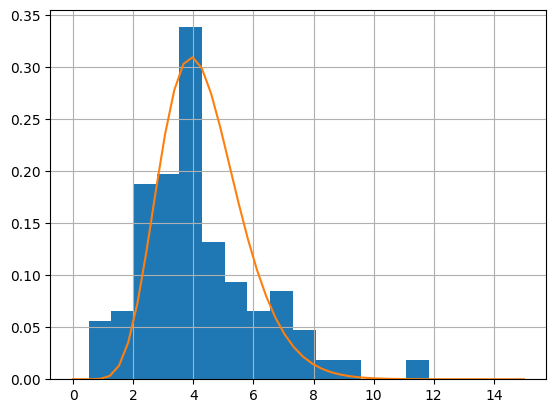

In [16]:
# Using the calculated mean of ualpha and ubeta for April month above, we plot the distribution as -

precip.Apr.hist(density = True, bins = 15)
plt.plot(np.linspace(0, 15), gamma.pdf(np.linspace(0, 15), Apr_ualpha_mean, scale = 1 / Apr_ubeta_mean))

## Plotting the Uniform Distribution for all months.

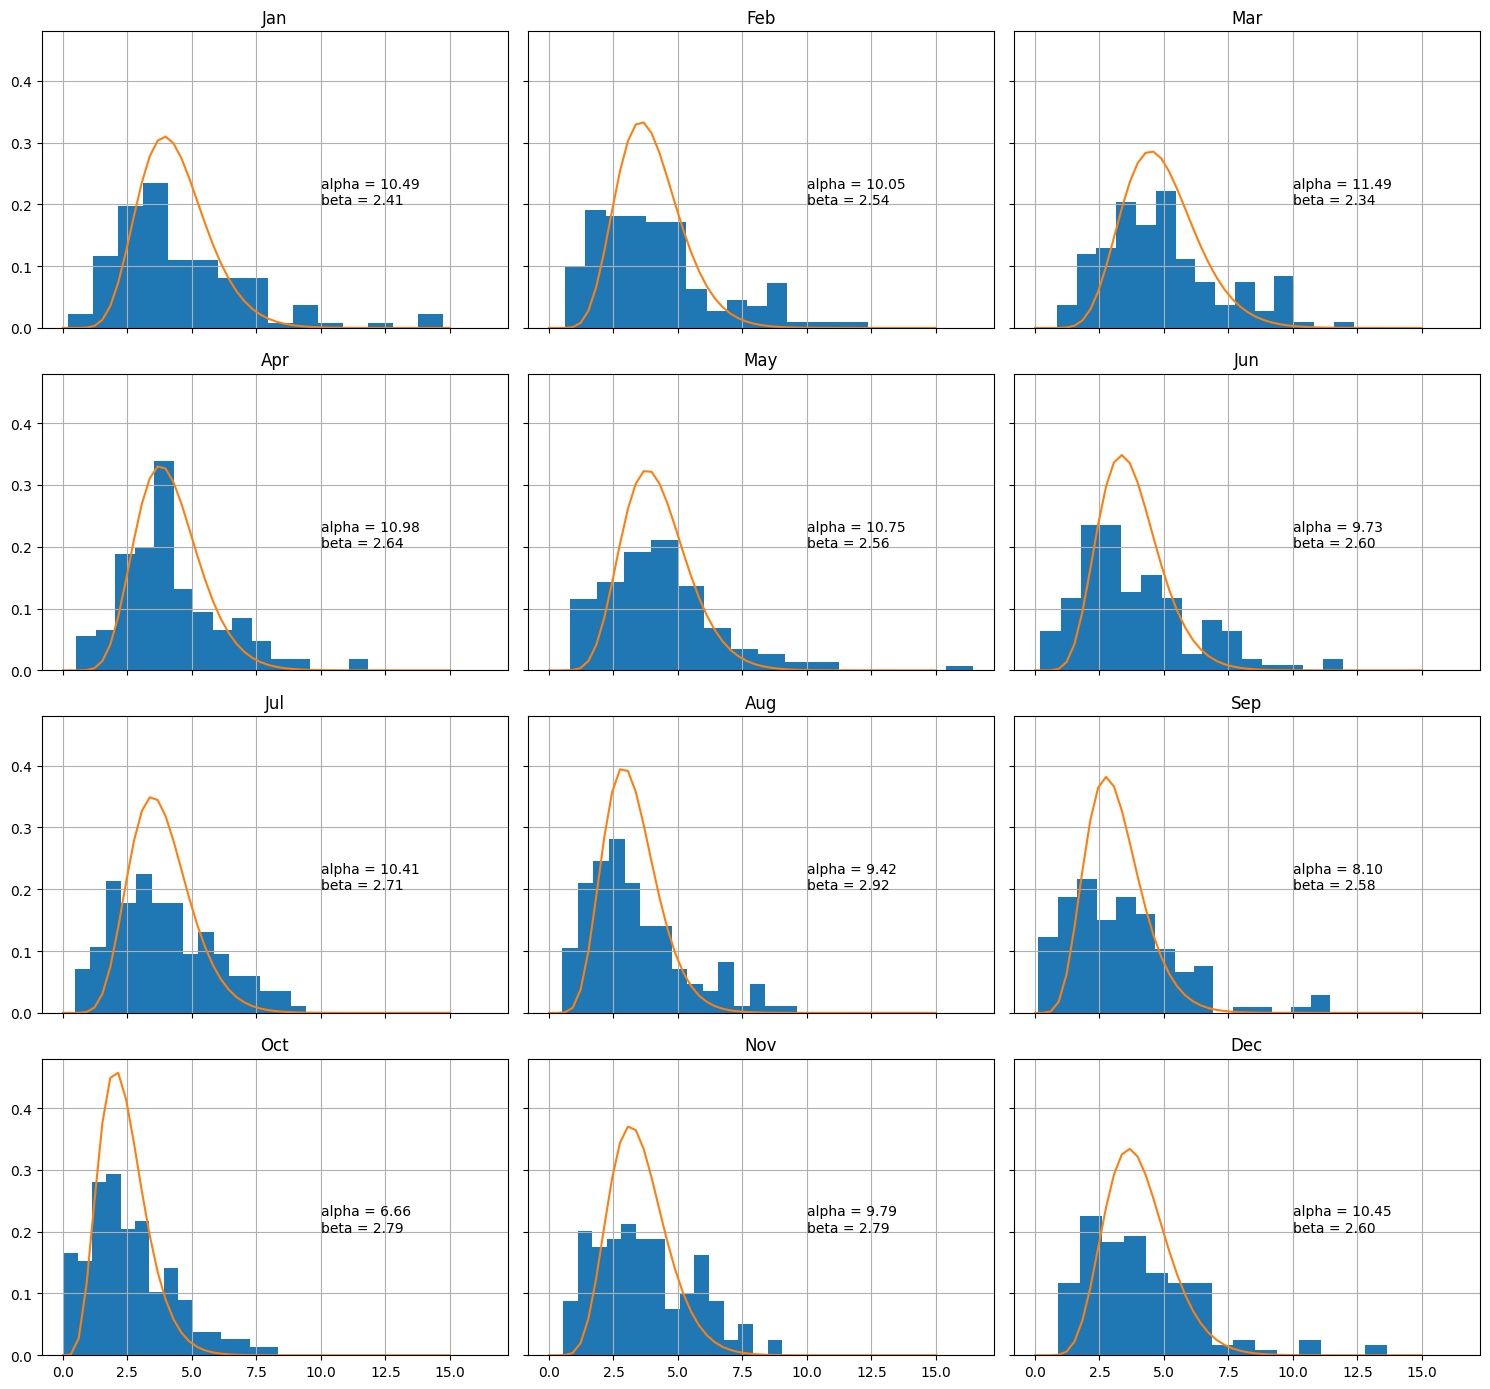

In [17]:
axs = precip.hist(density = True, figsize = (15, 14), sharex = True, sharey = True, bins = 15, grid = True)

index = 0
for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(0,15)
    ax.plot(x, gamma.pdf(x, summary_df.loc[f"ualpha[{index}]", "mean"], scale = 1/summary_df.loc[f"ubeta[{index}]", "mean"]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(summary_df.loc[f"ualpha[{index}]", "mean"], summary_df.loc[f"ubeta[{index}]", "mean"])
    ax.annotate(label, xy=(10, 0.2))
    index+=1
    
plt.tight_layout()

## Now, we will model using Exponential Distribution -

# Exponential Distribution

<AxesSubplot: >

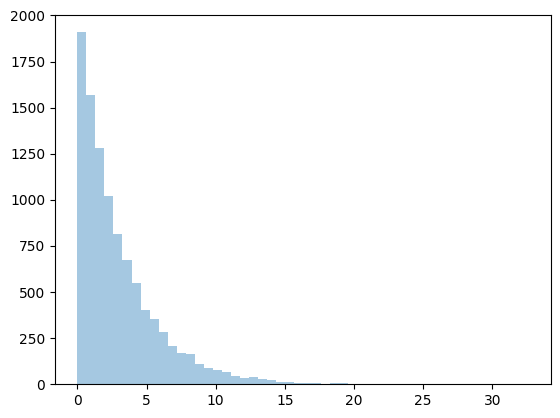

In [18]:
sns.distplot(Exponential.dist(1/3).random(size = 10000), kde = False)

In [19]:
# Modeling the rainfall data

In [20]:
with Model() as rainfall_model:
    exp_alpha = Exponential('exp_alpha', 1/3, shape = 12)
    exp_beta = Exponential('exp_beta', 1/3, shape = 12)

In [21]:
# Simulating the rainfall data to find best values for α and β parameters.

In [22]:
with rainfall_model:
    month_like = Gamma('april_like', alpha = exp_alpha, beta = exp_beta, observed = precip)

In [23]:
with rainfall_model: 
    rainfall_trace = fit(random_seed = RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 3,806.3


Got error No model on context stack. trying to find log_likelihood in translation.


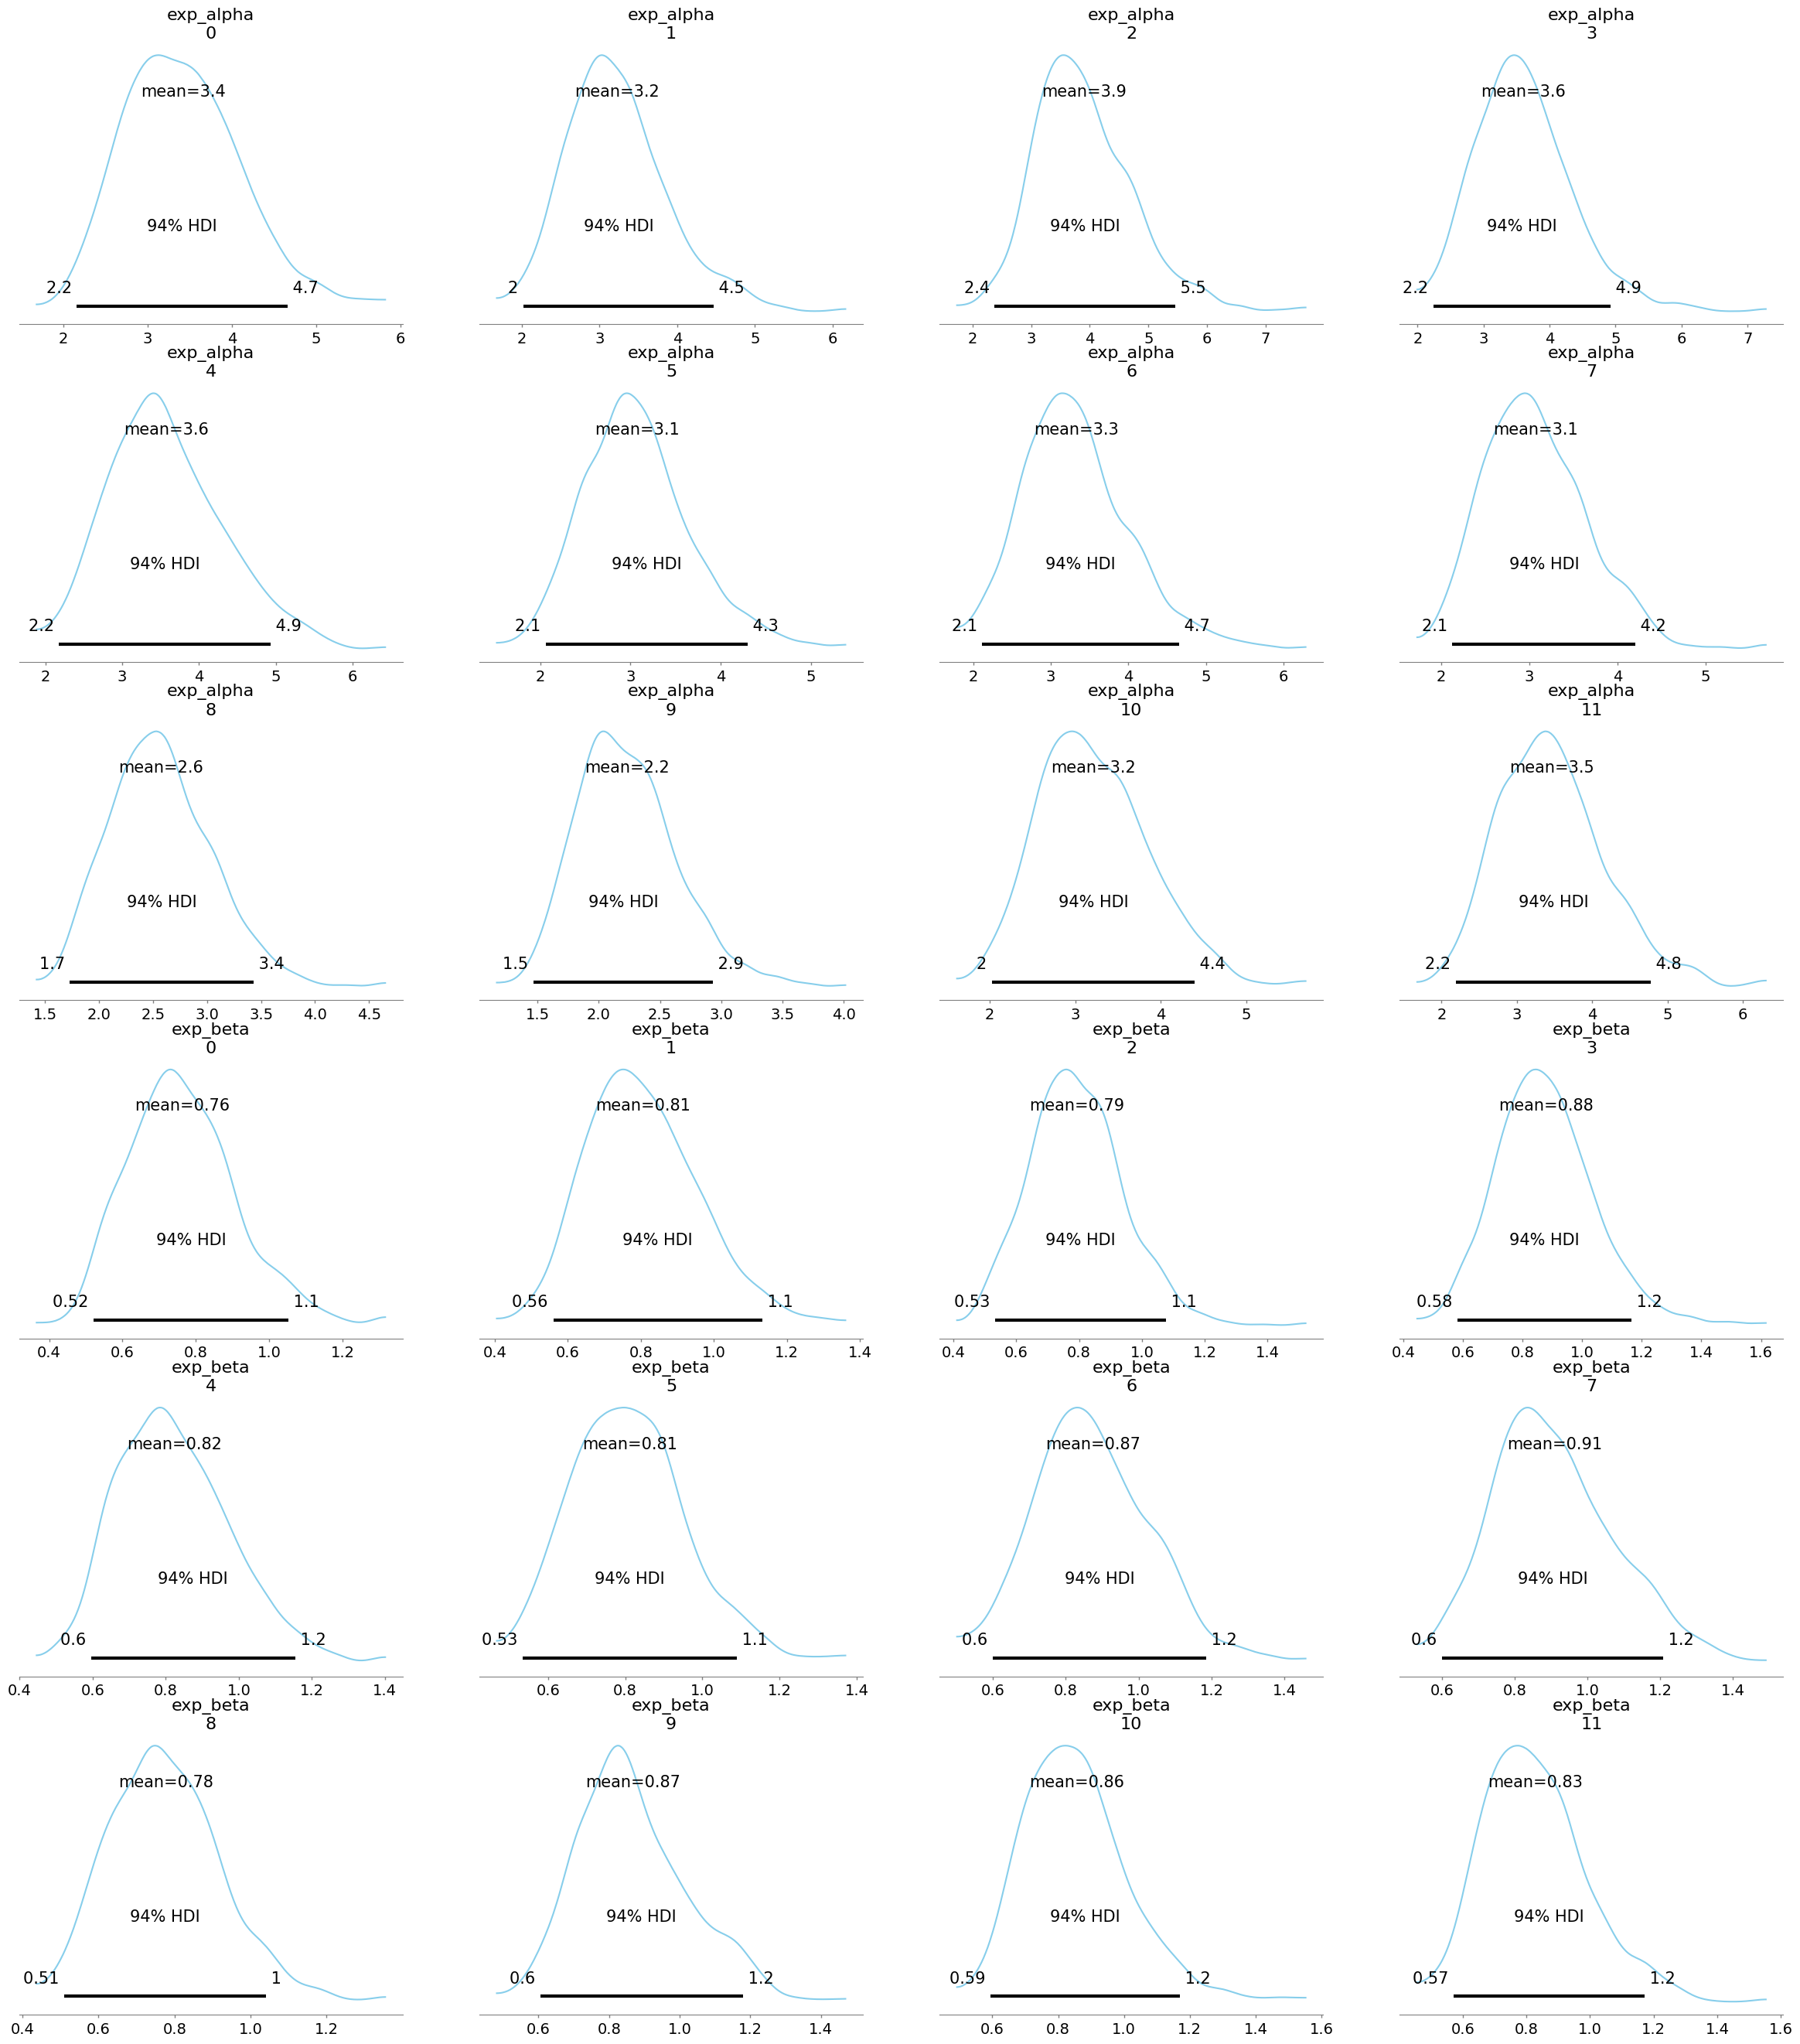

In [24]:
# Plotting the posterior pdf for the Nashville rainfall data

plot_posterior(rainfall_trace[100:], 
                var_names = ['exp_alpha', 'exp_beta'],
                color = '#87ceeb');

Got error No model on context stack. trying to find log_likelihood in translation.


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

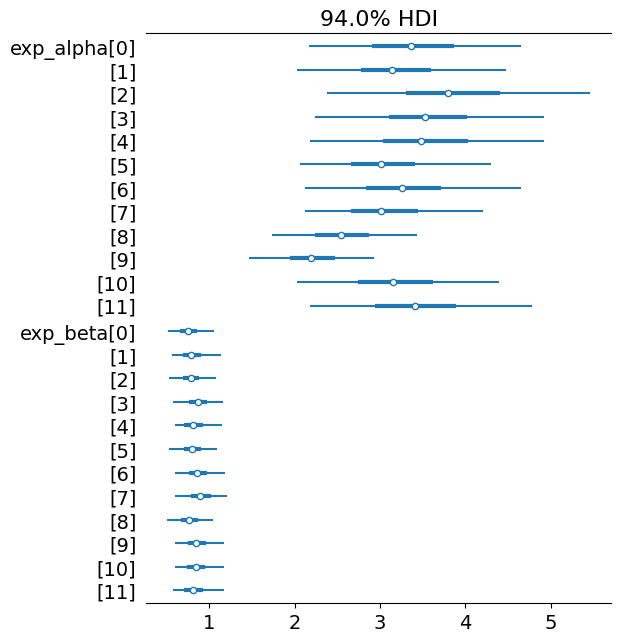

In [25]:
# Plotting the forest plot of rainfall trace

import arviz as az
az.plot_forest(rainfall_trace[100:], kind = 'forestplot')

In [26]:
summary_df = az.summary(rainfall_trace)
summary_df

Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
exp_alpha[0]   3.425  0.701   2.163    4.689      0.023    0.016     975.0   
exp_alpha[1]   3.232  0.650   2.055    4.513      0.020    0.014    1102.0   
exp_alpha[2]   3.900  0.826   2.377    5.425      0.025    0.018    1074.0   
exp_alpha[3]   3.612  0.735   2.275    5.002      0.025    0.017     905.0   
exp_alpha[4]   3.553  0.732   2.178    4.875      0.023    0.017     923.0   
exp_alpha[5]   3.069  0.594   2.066    4.293      0.018    0.013    1068.0   
exp_alpha[6]   3.321  0.697   2.110    4.682      0.023    0.016     938.0   
exp_alpha[7]   3.073  0.576   2.124    4.208      0.020    0.014     826.0   
exp_alpha[8]   2.571  0.475   1.715    3.395      0.017    0.012     798.0   
exp_alpha[9]   2.232  0.412   1.466    2.932      0.014    0.010     817.0   
exp_alpha[10]  3.211  0.656   2.032    4.414      0.020    0.014    1066.0   
exp_alpha[11]  3.460  0.711   2.176    4.733      0.024    0.017     852.0   
exp_beta[0]    0.764  0.148   0.512    1.050      0.005    0.004     914.0   
exp_beta[1]    0.803  0.154   0.565    1.132      0.005    0.004     821.0   
exp_beta[2]    0.791  0.148   0.529    1.076      0.005    0.004     808.0   
exp_beta[3]    0.874  0.166   0.581    1.167      0.005    0.004     947.0   
exp_beta[4]    0.822  0.154   0.595    1.161      0.005    0.003     982.0   
exp_beta[5]    0.812  0.152   0.528    1.091      0.005    0.003    1001.0   
exp_beta[6]    0.874  0.161   0.598    1.186      0.005    0.004     950.0   
exp_beta[7]    0.907  0.166   0.604    1.207      0.005    0.004     950.0   
exp_beta[8]    0.776  0.147   0.507    1.038      0.005    0.003    1074.0   
exp_beta[9]    0.867  0.156   0.607    1.179      0.005    0.004     921.0   
exp_beta[10]   0.854  0.163   0.564    1.162      0.005    0.004    1011.0   
exp_beta[11]   0.828  0.161   0.568    1.167      0.005    0.003    1096.0   

               ess_tail  r_hat  
exp_alpha[0]      881.0    NaN  
exp_alpha[1]      904.0    NaN  
exp_alpha[2]      949.0    NaN  
exp_alpha[3]      942.0    NaN  
exp_alpha[4]      944.0    NaN  
exp_alpha[5]      929.0    NaN  
exp_alpha[6]      821.0    NaN  
exp_alpha[7]     1024.0    NaN  
exp_alpha[8]      890.0    NaN  
exp_alpha[9]      841.0    NaN  
exp_alpha[10]     978.0    NaN  
exp_alpha[11]     973.0    NaN  
exp_beta[0]       785.0    NaN  
exp_beta[1]       876.0    NaN  
exp_beta[2]       814.0    NaN  
exp_beta[3]       983.0    NaN  
exp_beta[4]       983.0    NaN  
exp_beta[5]       912.0    NaN  
exp_beta[6]       886.0    NaN  
exp_beta[7]       944.0    NaN  
exp_beta[8]      1023.0    NaN  
exp_beta[9]       873.0    NaN  
exp_beta[10]      910.0    NaN  
exp_beta[11]      840.0    NaN

In [27]:
# Defining ualpha_mean and ubeta_mean for April

Apr_exp_alpha_mean = summary_df.loc["exp_alpha[0]", "mean"]
Apr_exp_beta_mean = summary_df.loc["exp_beta[0]", "mean"]
Apr_exp_alpha_mean, Apr_exp_beta_mean

(3.425, 0.764)

## Plotting the graph that represents the Exponential Distribution for the April month.

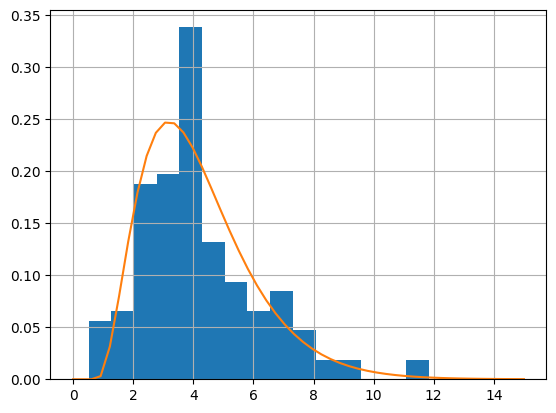

In [28]:
# We now use the calculated exponential alpha and beta values to plot the distribution using the gamma.pdf function

precip.Apr.hist(density = True, bins = 15)
plt.plot(np.linspace(0, 15), gamma.pdf(np.linspace(0, 15), Apr_exp_alpha_mean, Apr_exp_beta_mean))

## Plotting the Exponential Distribution for all months.

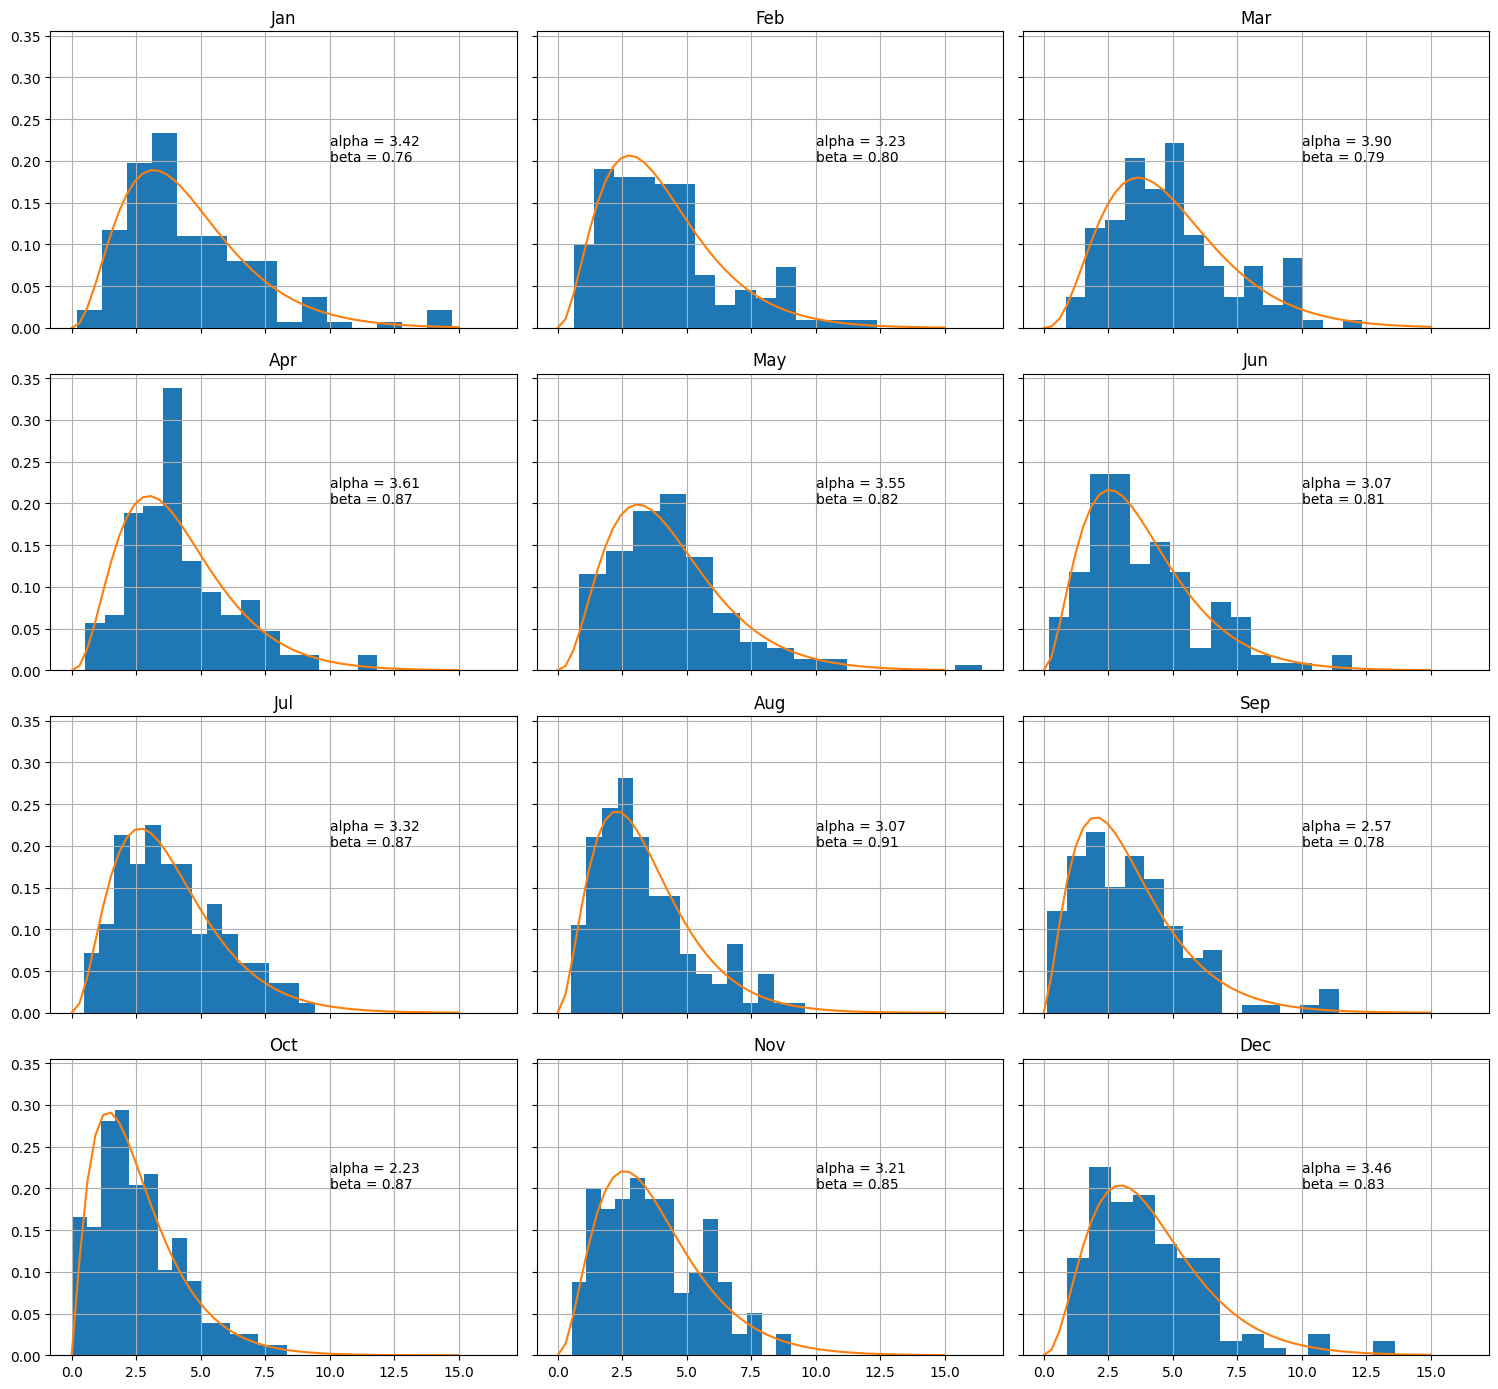

In [29]:
axs = precip.hist(density = True, figsize = (15, 14), sharex = True, sharey = True, bins = 15, grid = True)

index = 0
for ax in axs.ravel():

    m = ax.get_title()

    # Plot fitted distribution
    
    x = np.linspace(0, 15)
    ax.plot(x, gamma.pdf(x, summary_df.loc[f"exp_alpha[{index}]", "mean"], scale = 1/summary_df.loc[f"exp_beta[{index}]", "mean"]))

    # Annotate with parameter estimates
    
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(summary_df.loc[f"exp_alpha[{index}]", "mean"], summary_df.loc[f"exp_beta[{index}]", "mean"])
    ax.annotate(label, xy = (10, 0.2))
    index+=1
    
plt.tight_layout()

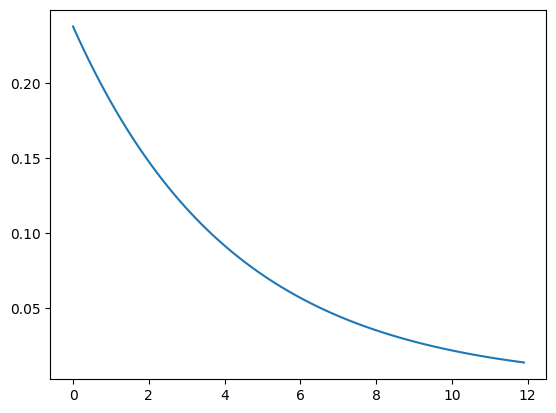

In [30]:
precip_april = precip['Apr']

mean_of_precip_april = precip_april.mean()

lamb = 1 / mean_of_precip_april

a = np.arange(0, 12, 0.1)
b = lamb * np.exp(-lamb * a)

plt.plot(a, b)

# We built a Bayesian Model for the Nashville precipitation data to find the best parameters of the rainfall dataset. Thus, the data was inferred from the model generated rather than the data.